In [16]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
df = pd.read_csv('Melbourne.csv')
df


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,Wyndham Vale,25 Clitheroe Dr,3,u,NaN,PN,Harcourts,26-08-2017,27.2,3024.0,...,1.0,0.0,552.0,119.0,1990.0,NaN,-37.90032,144.61839,Western Metropolitan,5262.0
23543,Wyndham Vale,19 Dalrymple Bvd,4,h,NaN,S,hockingstuart,26-08-2017,27.2,3024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-37.87882,144.60184,Western Metropolitan,5262.0
23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26-08-2017,12.7,3085.0,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26-08-2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [5]:
# This is the dataset and i want to perform these operations on it
# first explore the data with histogram graphs
# understand how the graph is distributed and check for skewness and null values
# Fill duplicate values(Drop if neccessary)
# Check data types

# Data Cleaning
# 1. Fillna
# 2. Null value handle with mean 

# Use Normalizer class on neccessary columns and then Use Standard Scaler(Price and Postcode) on neccessary 

# # Linear Regression and Ridge regression

SyntaxError: invalid syntax (525047517.py, line 1)

In [3]:
print("Shape of dataset", df.shape)
df.info()

Shape of dataset (23547, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         23547 non-null  object 
 1   Address        23547 non-null  object 
 2   Rooms          23547 non-null  int64  
 3   Type           23547 non-null  object 
 4   Price          18396 non-null  float64
 5   Method         23547 non-null  object 
 6   SellerG        23547 non-null  object 
 7   Date           23547 non-null  object 
 8   Distance       23546 non-null  float64
 9   Postcode       23546 non-null  float64
 10  Bedroom2       19066 non-null  float64
 11  Bathroom       19063 non-null  float64
 12  Car            18921 non-null  float64
 13  Landsize       17410 non-null  float64
 14  BuildingArea   10018 non-null  float64
 15  YearBuilt      11540 non-null  float64
 16  CouncilArea    15656 non-null  object 
 17  Lattitude      19243 

In [4]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [28]:
df.isnull().sum()
# print((df.isnull().sum() / len(df)) * 100)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23543,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23544,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23545,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


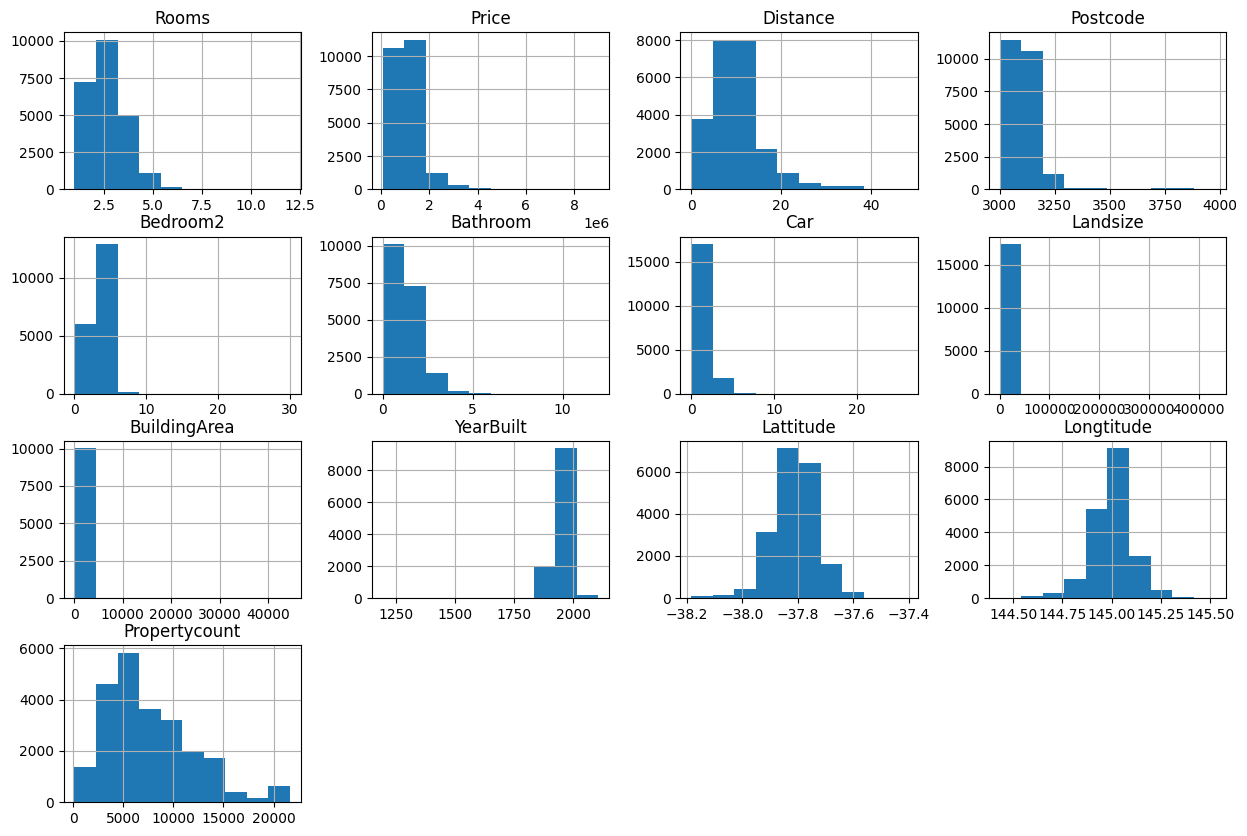

In [16]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df.hist(figsize=(15,10))
plt.show()

In [30]:
df[numeric_cols].skew()

Rooms              0.502241
Price              2.366673
Distance           1.674116
Postcode           4.163566
Bedroom2           1.667159
Bathroom           1.433138
Car                2.136242
Landsize         106.067305
BuildingArea      88.598403
YearBuilt         -1.228668
Lattitude         -0.316535
Longtitude        -0.312324
Propertycount      1.056709
dtype: float64

In [32]:
df = df.drop_duplicates()

In [12]:
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['Price'].unique()

array([1056697.46091542, 1480000.        , 1035000.        , ...,
        717500.        , 1288000.        , 1263500.        ])

In [15]:
df.duplicated().sum()
df = df.drop_duplicates()

In [29]:
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23546 entries, 0 to 23546
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         23546 non-null  object 
 1   Address        23546 non-null  object 
 2   Rooms          23546 non-null  int64  
 3   Type           23546 non-null  object 
 4   Price          23546 non-null  float64
 5   Method         23546 non-null  object 
 6   SellerG        23546 non-null  object 
 7   Date           23546 non-null  object 
 8   Distance       23546 non-null  float64
 9   Postcode       23546 non-null  float64
 10  Bedroom2       23546 non-null  float64
 11  Bathroom       23546 non-null  float64
 12  Car            23546 non-null  float64
 13  Landsize       23546 non-null  float64
 14  BuildingArea   23546 non-null  float64
 15  YearBuilt      23546 non-null  float64
 16  CouncilArea    23546 non-null  object 
 17  Lattitude      23546 non-null  float64
 18  Longtitude 

In [33]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23546 entries, 0 to 23546
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         23546 non-null  object 
 1   Address        23546 non-null  object 
 2   Rooms          23546 non-null  int64  
 3   Type           23546 non-null  object 
 4   Price          23546 non-null  float64
 5   Method         23546 non-null  object 
 6   SellerG        23546 non-null  object 
 7   Date           23546 non-null  object 
 8   Distance       23546 non-null  float64
 9   Postcode       23546 non-null  float64
 10  Bedroom2       23546 non-null  float64
 11  Bathroom       23546 non-null  float64
 12  Car            23546 non-null  float64
 13  Landsize       23546 non-null  float64
 14  BuildingArea   23546 non-null  float64
 15  YearBuilt      23546 non-null  float64
 16  CouncilArea    23546 non-null  object 
 17  Lattitude      23546 non-null  float64
 18  Longtitude 

In [35]:
df_model = df.select_dtypes(include=['int64','float64'])


X = df_model.drop('Price', axis=1)
y = df_model['Price']

In [36]:
norm = Normalizer()

cols_to_normalize = ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt']

df_model[cols_to_normalize] = norm.fit_transform(df_model[cols_to_normalize])

In [37]:
df_model

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,0.001013,1.056697e+06,0.001266,3067.0,0.001013,0.000506,0.000506,0.063806,0.078249,0.994888,-37.80140,144.99580,4019.0
1,0.001010,1.480000e+06,0.001262,3067.0,0.001010,0.000505,0.000505,0.101967,0.078000,0.991723,-37.79960,144.99840,4019.0
2,0.001048,1.035000e+06,0.001310,3067.0,0.001048,0.000524,0.000000,0.081760,0.041404,0.995790,-37.80790,144.99340,4019.0
3,0.001522,1.056697e+06,0.001269,3067.0,0.001522,0.001015,0.000507,0.000000,0.078409,0.996918,-37.81140,145.01160,4019.0
4,0.001570,1.465000e+06,0.001308,3067.0,0.001570,0.001047,0.000000,0.070134,0.078508,0.994439,-37.80930,144.99440,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,0.001450,1.056697e+06,0.013148,3024.0,0.001450,0.000483,0.000000,0.266828,0.057523,0.961934,-37.90032,144.61839,5262.0
23543,0.001954,1.056697e+06,0.013290,3024.0,0.001442,0.000767,0.000795,0.269603,0.075498,0.959912,-37.87882,144.60184,5262.0
23544,0.001955,1.100000e+06,0.006206,3085.0,0.001955,0.001466,0.000977,0.269621,0.075503,0.959976,-37.72006,145.10547,1369.0
23545,0.002044,1.285000e+06,0.003219,3013.0,0.002044,0.000511,0.000511,0.184972,0.057229,0.981066,-37.81188,144.88449,6543.0


In [38]:
scaler = StandardScaler()

df_model[['Price','Postcode']] = scaler.fit_transform(df_model[['Price','Postcode']])

In [39]:
df_model

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,0.001013,4.103617e-16,0.001266,-0.452623,0.001013,0.000506,0.000506,0.063806,0.078249,0.994888,-37.80140,144.99580,4019.0
1,0.001010,7.460665e-01,0.001262,-0.452623,0.001010,0.000505,0.000505,0.101967,0.078000,0.991723,-37.79960,144.99840,4019.0
2,0.001048,-3.824156e-02,0.001310,-0.452623,0.001048,0.000524,0.000000,0.081760,0.041404,0.995790,-37.80790,144.99340,4019.0
3,0.001522,4.103617e-16,0.001269,-0.452623,0.001522,0.001015,0.000507,0.000000,0.078409,0.996918,-37.81140,145.01160,4019.0
4,0.001570,7.196291e-01,0.001308,-0.452623,0.001570,0.001047,0.000000,0.070134,0.078508,0.994439,-37.80930,144.99440,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,0.001450,4.103617e-16,0.013148,-0.907553,0.001450,0.000483,0.000000,0.266828,0.057523,0.961934,-37.90032,144.61839,5262.0
23543,0.001954,4.103617e-16,0.013290,-0.907553,0.001442,0.000767,0.000795,0.269603,0.075498,0.959912,-37.87882,144.60184,5262.0
23544,0.001955,7.632029e-02,0.006206,-0.262188,0.001955,0.001466,0.000977,0.269621,0.075503,0.959976,-37.72006,145.10547,1369.0
23545,0.002044,4.023809e-01,0.003219,-1.023930,0.002044,0.000511,0.000511,0.184972,0.057229,0.981066,-37.81188,144.88449,6543.0


In [40]:
X = df_model.drop('Price', axis=1)
y = df_model['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))

Linear Regression R2 Score: 0.3644934268168888
Linear Regression MSE: 0.6620608123186947


In [42]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge R2 Score:", r2_score(y_test, y_pred_ridge))
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))

Ridge R2 Score: 0.15908438763283073
Ridge MSE: 0.8760527379389759


In [43]:
df = df.drop(['Address','Date','SellerG'], axis=1)
df.dropna()


,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,1.056697e+06,SS,2.5,3067.0,2.000000,1.000000,1.000000,126.000000,154.52076,1964.633677,Yarra,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1.480000e+06,S,2.5,3067.0,2.000000,1.000000,1.000000,202.000000,154.52076,1964.633677,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1.035000e+06,S,2.5,3067.0,2.000000,1.000000,0.000000,156.000000,79.00000,1900.000000,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,3,u,1.056697e+06,VB,2.5,3067.0,3.000000,2.000000,1.000000,0.000000,154.52076,1964.633677,Yarra,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1.465000e+06,SP,2.5,3067.0,3.000000,2.000000,0.000000,134.000000,150.00000,1900.000000,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,Wyndham Vale,3,u,1.056697e+06,PN,27.2,3024.0,3.000000,1.000000,0.000000,552.000000,119.00000,1990.000000,Boroondara,-37.90032,144.61839,Western Metropolitan,5262.0
23543,Wyndham Vale,4,h,1.056697e+06,S,27.2,3024.0,2.951954,1.570822,1.626216,551.791889,154.52076,1964.633677,Boroondara,-37.87882,144.60184,Western Metropolitan,5262.0
23544,Yallambie,4,h,1.100000e+06,S,12.7,3085.0,4.000000,3.000000,2.000000,551.791889,154.52076,1964.633677,Boroondara,-37.72006,145.10547,Northern Metropolitan,1369.0
23545,Yarraville,4,h,1.285000e+06,SP,6.3,3013.0,4.000000,1.000000,1.000000,362.000000,112.00000,1920.000000,Boroondara,-37.81188,144.88449,Western Metropolitan,6543.0


In [44]:
y = df['Price']
X = df.drop('Price', axis=1)

In [45]:
X = pd.get_dummies(X, drop_first=True)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.4762231581574595
